In [1]:
# %pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\austinsh\AppData\Local\Temp\ipykernel_38612\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [4]:
#df_outlierHandling = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_outlierHandling.csv')

df_outlierHandling = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\5 Preprocessing - Slecected Features\Continuous Data\adjusted_Limits.csv')

# Print descriptive statistics for df_outlierHandling
df_outlierHandling.describe()

425_pct_Al         Al2O3    C4_pct_Eth    C4_pct_H2O    C4_pct_Hex  \
count  62087.000000  62087.000000  62087.000000  62087.000000  62087.000000   
mean       6.131070     11.339998      1.450625     21.377496      0.539864   
std        0.441331      0.599528      3.470850      4.436103      0.841435   
min        0.130641      8.710000      0.001000      0.057000      0.000000   
25%        6.002165     11.051150      0.621779     18.769650      0.333479   
50%        6.146680     11.480900      1.090530     21.399800      0.436663   
75%        6.309910     11.703400      1.695955     23.318800      0.538983   
max        8.058320     12.907000     77.165000     95.818000     13.392400   

            Butanol       DI55102       DI55152       DI55580       FC55003  \
count  62087.000000  62087.000000  62087.000000  62087.000000  62087.000000   
mean      12.714689      0.945531      0.933688      0.999724   5720.703537   
std       16.375373      0.054726      0.032875      0.051062   1629.831102   
min        0.000000      0.800002      0.793226      0.793765      0.000000   
25%        3.899830      0.910495      0.912969      0.968810   5326.610000   
50%        6.219770      0.951505      0.933910      0.999418   5956.310000   
75%       13.143450      0.986930      0.953388      1.035285   6549.405000   
max       99.950000      1.120200      1.165020      1.165180  15157.500000   

            FC55569       FC55576      FFC55555       LC90366       PI55020  \
count  62087.000000  62087.000000  62087.000000  62087.000000  62087.000000   
mean    6333.247238    352.798429      0.729795     45.465782     -1.376596   
std     1356.599100    260.776477      0.175628     28.828185      1.216759   
min        0.000000      0.000000      0.000000      0.000000     -9.653360   
25%     6282.230000    150.346500      0.751104     19.895100     -2.290595   
50%     6554.030000    332.531000      0.770490     46.435800     -1.313980   
75%     6815.905000    524.179000      0.785437     75.455500     -0.316690   
max    10503.000000   1461.990000      1.000000     87.901600      8.127770   

            TI40050       TI55021  
count  62087.000000  62087.000000  
mean      73.393478    219.644475  
std       15.288994     26.354261  
min        0.000000     37.000700  
25%       62.987000    217.170500  
50%       76.648100    220.284000  
75%       84.864500    224.532000  
max      118.700000    346.879000

In [5]:
num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 18


In [6]:
# # Assuming df_outlierHandling is your DataFrame
# non_date_columns = df_outlierHandling.columns[df_outlierHandling.columns != 'Date']

# # Drop rows where any value (excluding 'Date') is 0 or less
# df_outlierHandling = df_outlierHandling.drop(df_outlierHandling[(df_outlierHandling[non_date_columns] <= 100).any(axis=1)].index)

# df_outlierHandling



In [7]:
df_outlierHandling['Date'] = pd.to_datetime(df_outlierHandling['Date'])
print(df_outlierHandling.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


Date          datetime64[ns]
425_pct_Al           float64
Al2O3                float64
C4_pct_Eth           float64
C4_pct_H2O           float64
C4_pct_Hex           float64
Butanol              float64
DI55102              float64
DI55152              float64
DI55580              float64
FC55003              float64
FC55569              float64
FC55576              float64
FFC55555             float64
LC90366              float64
PI55020              float64
TI40050              float64
TI55021              float64
dtype: object


Skipping datetime column: Date


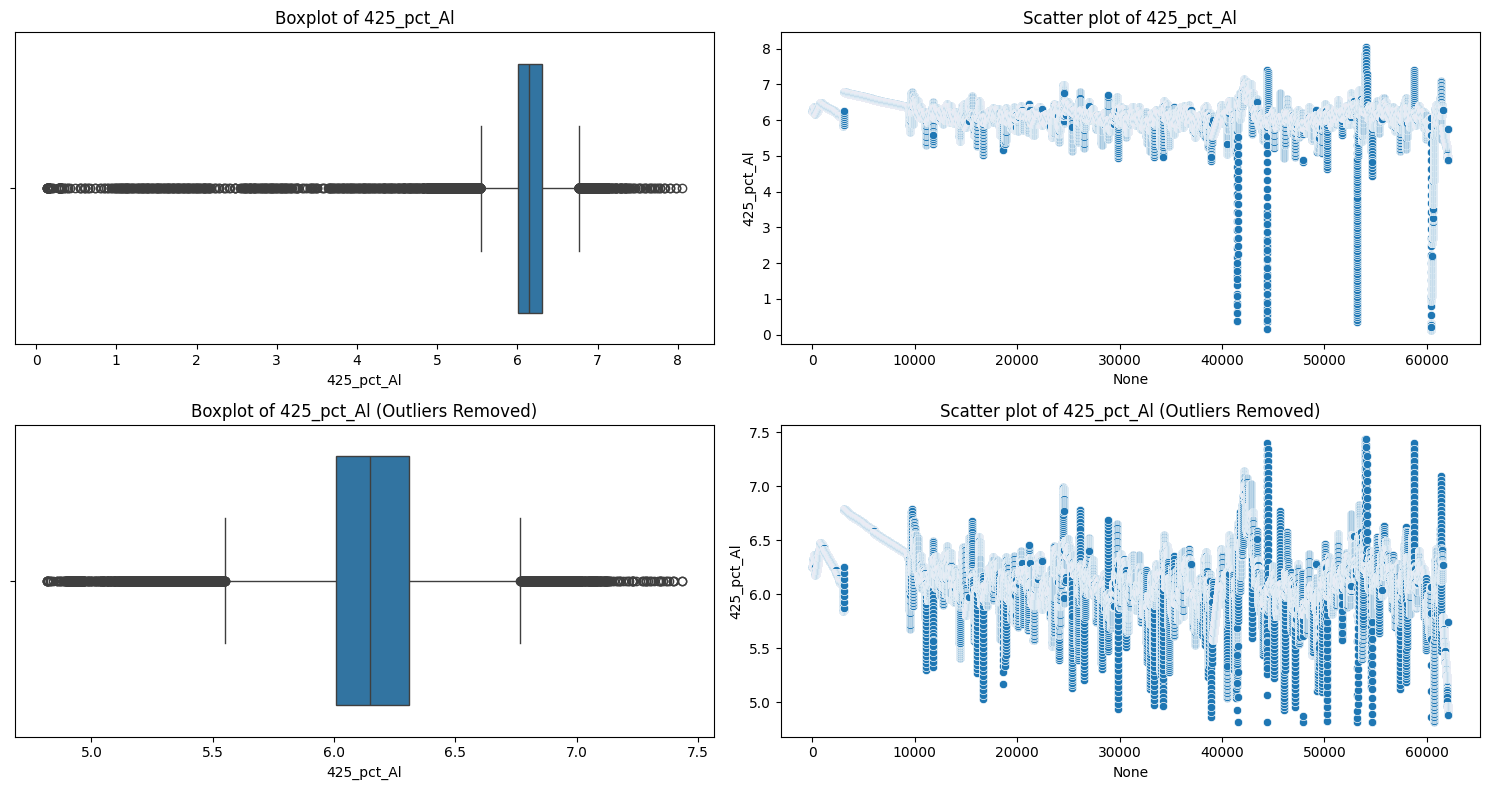

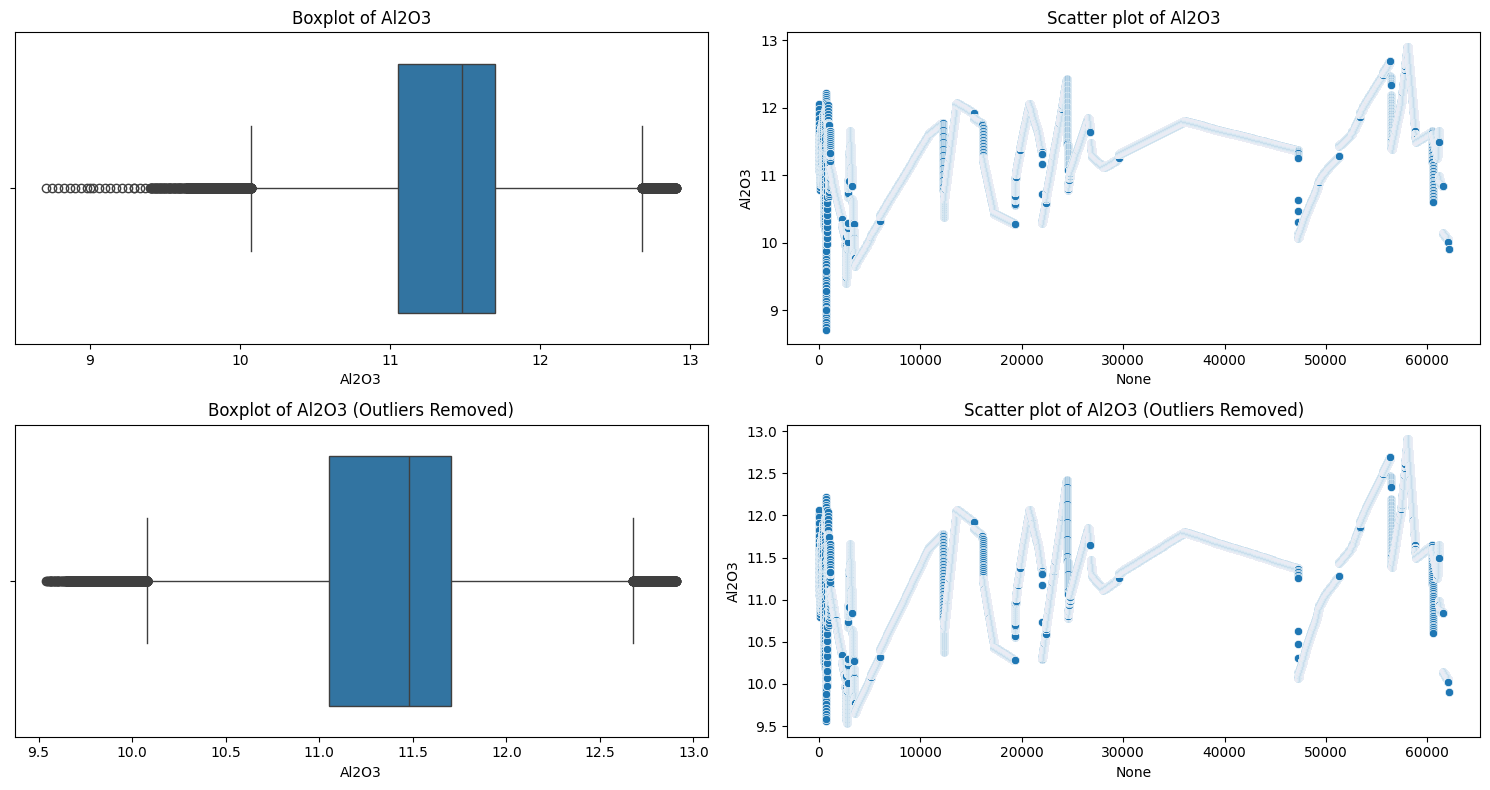

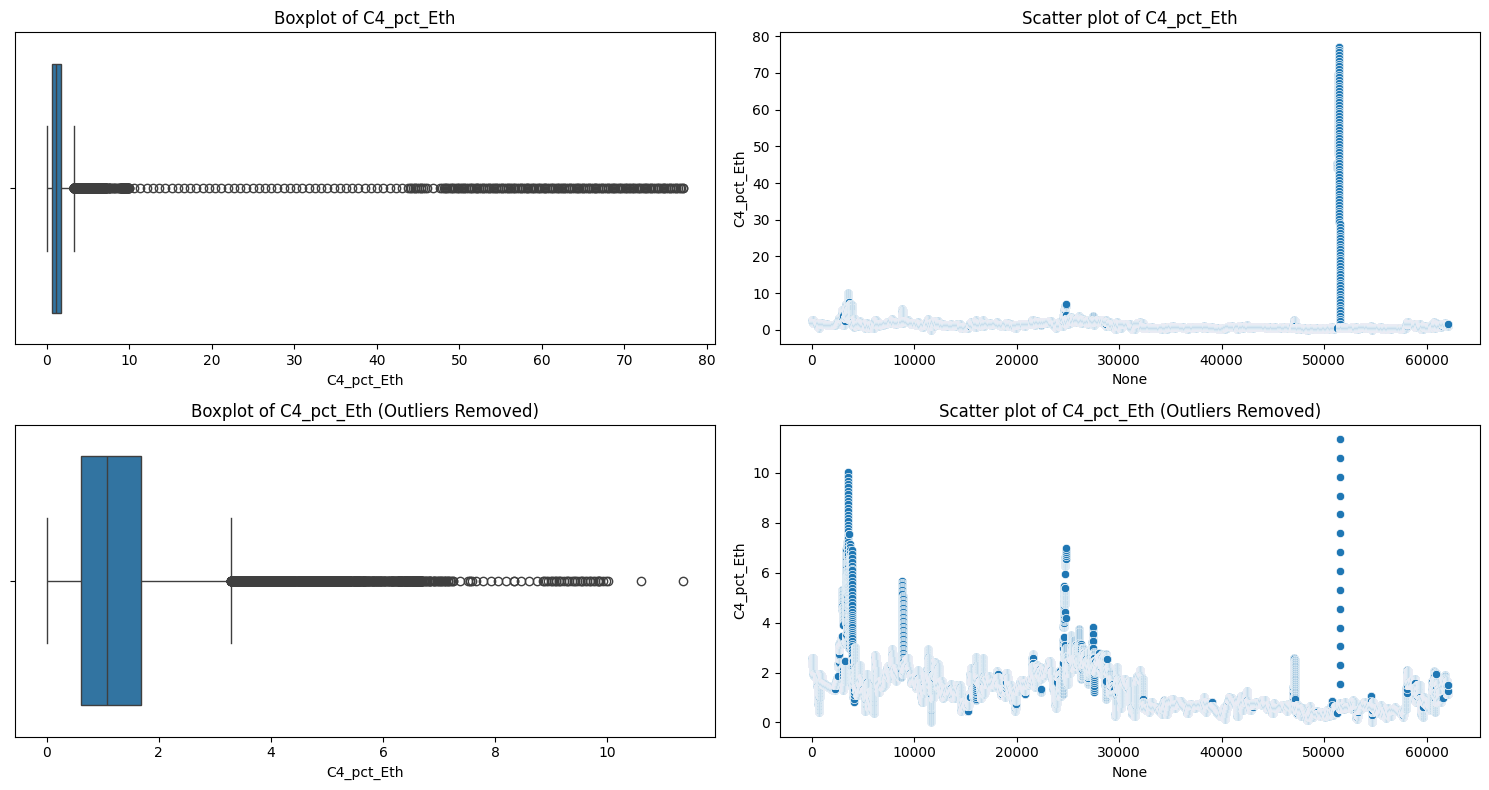

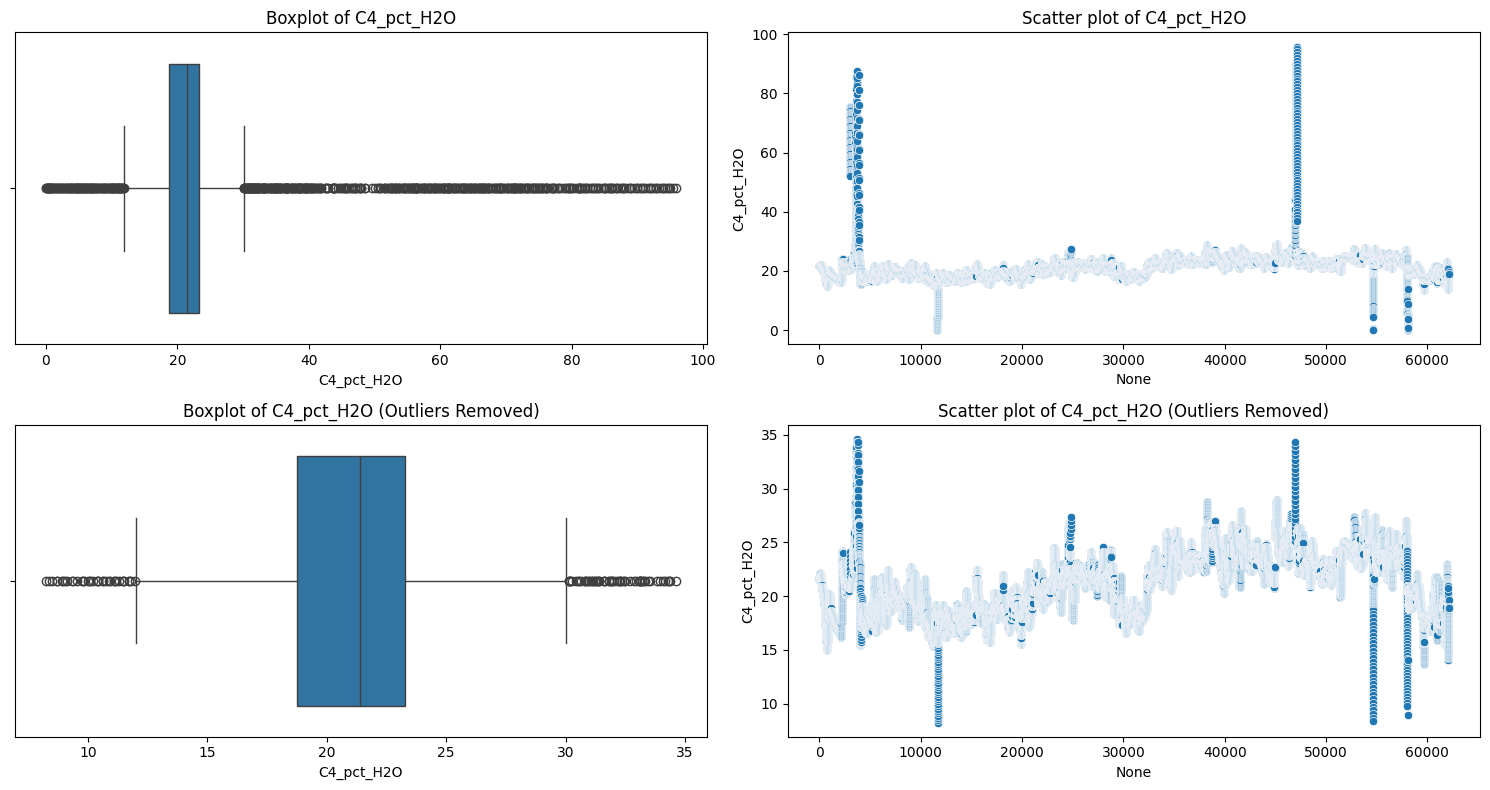

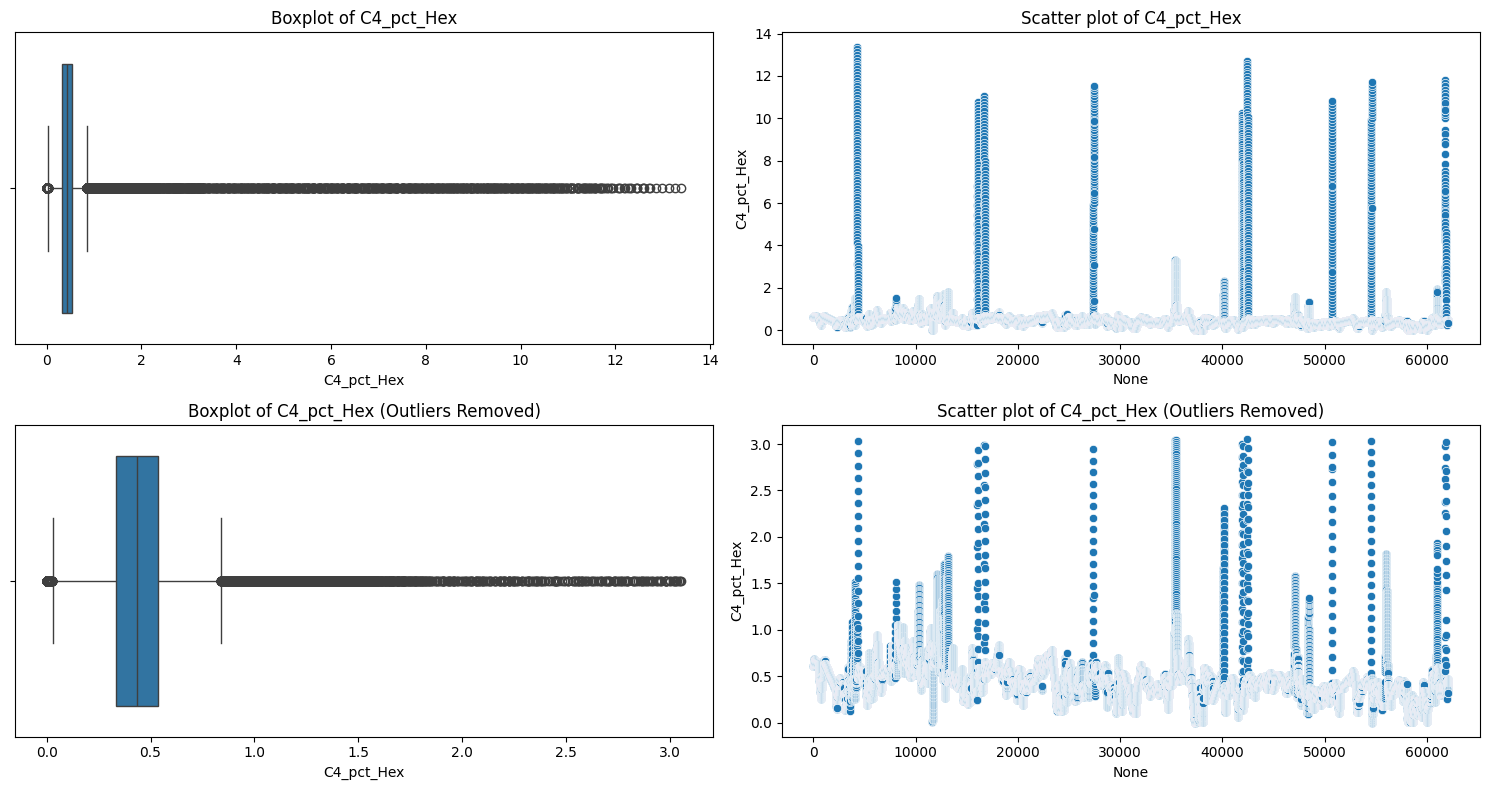

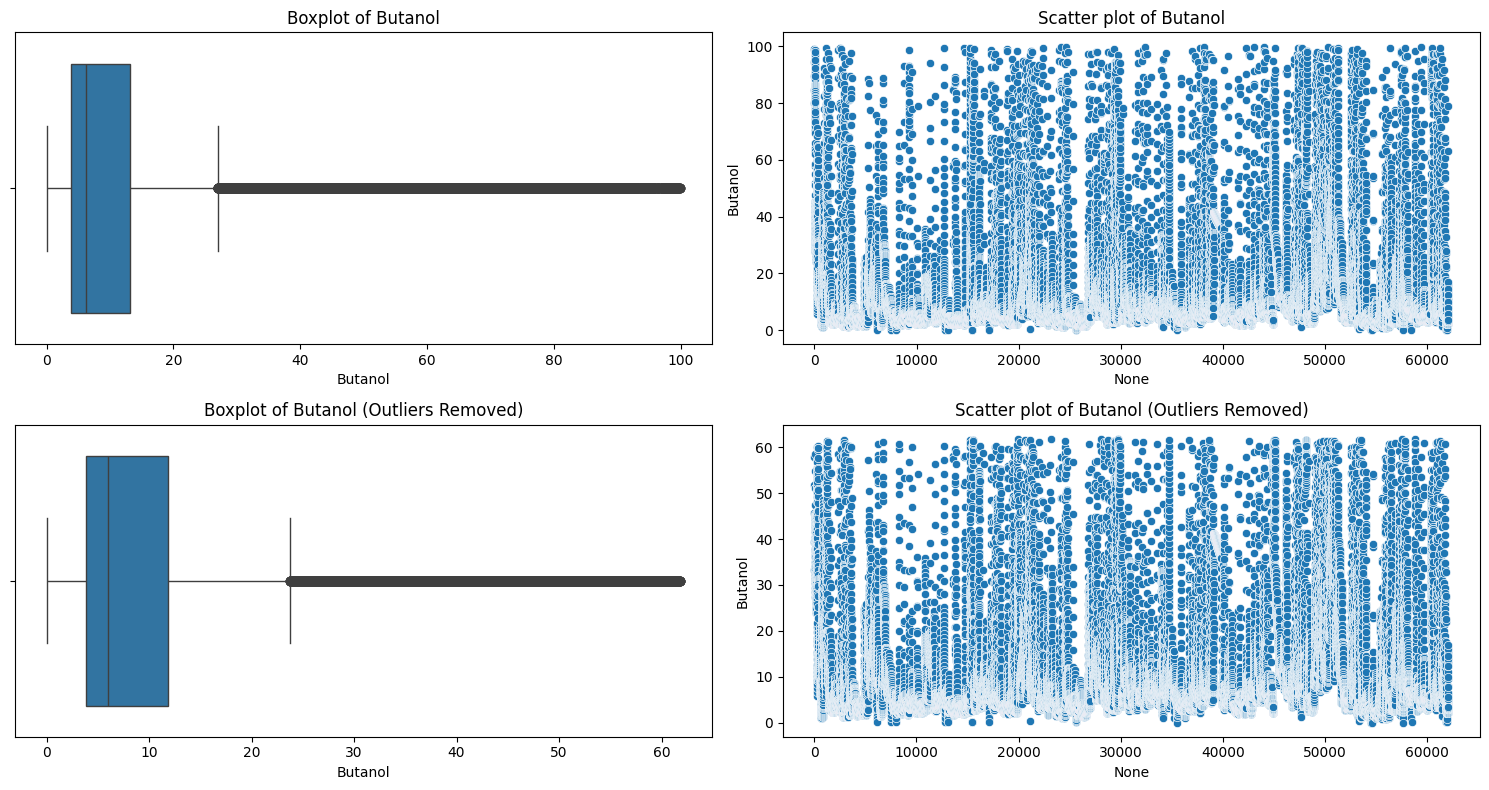

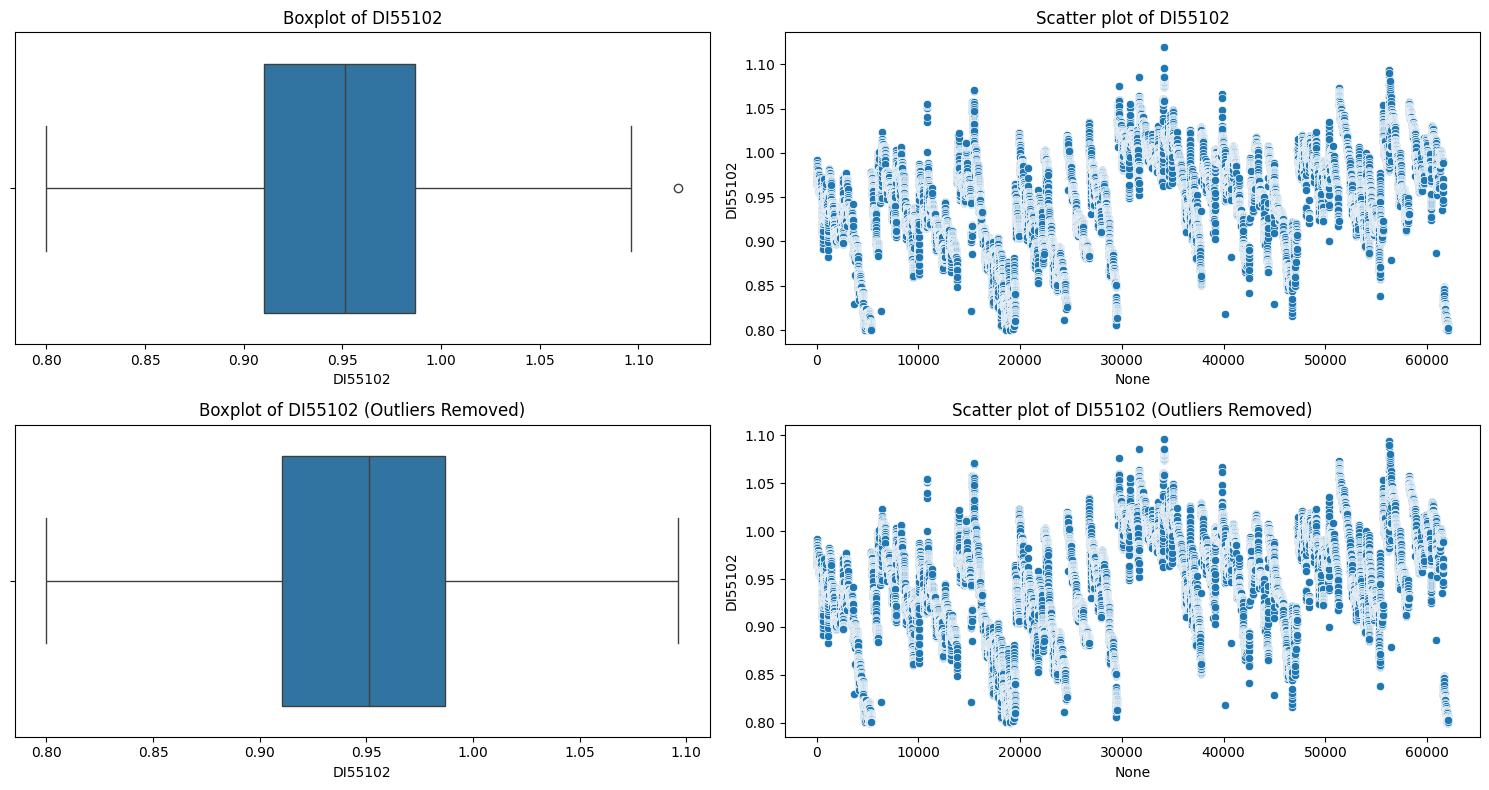

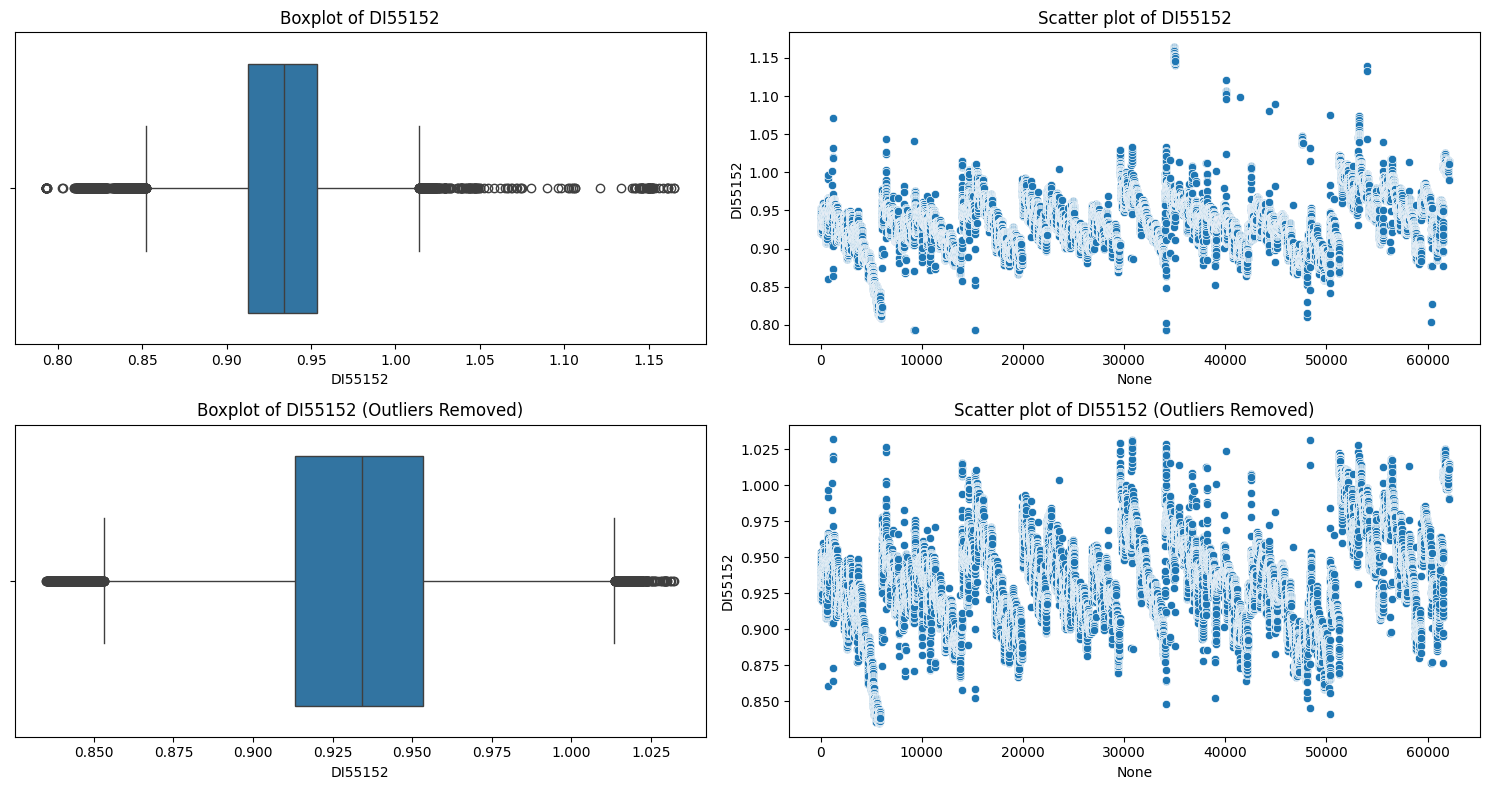

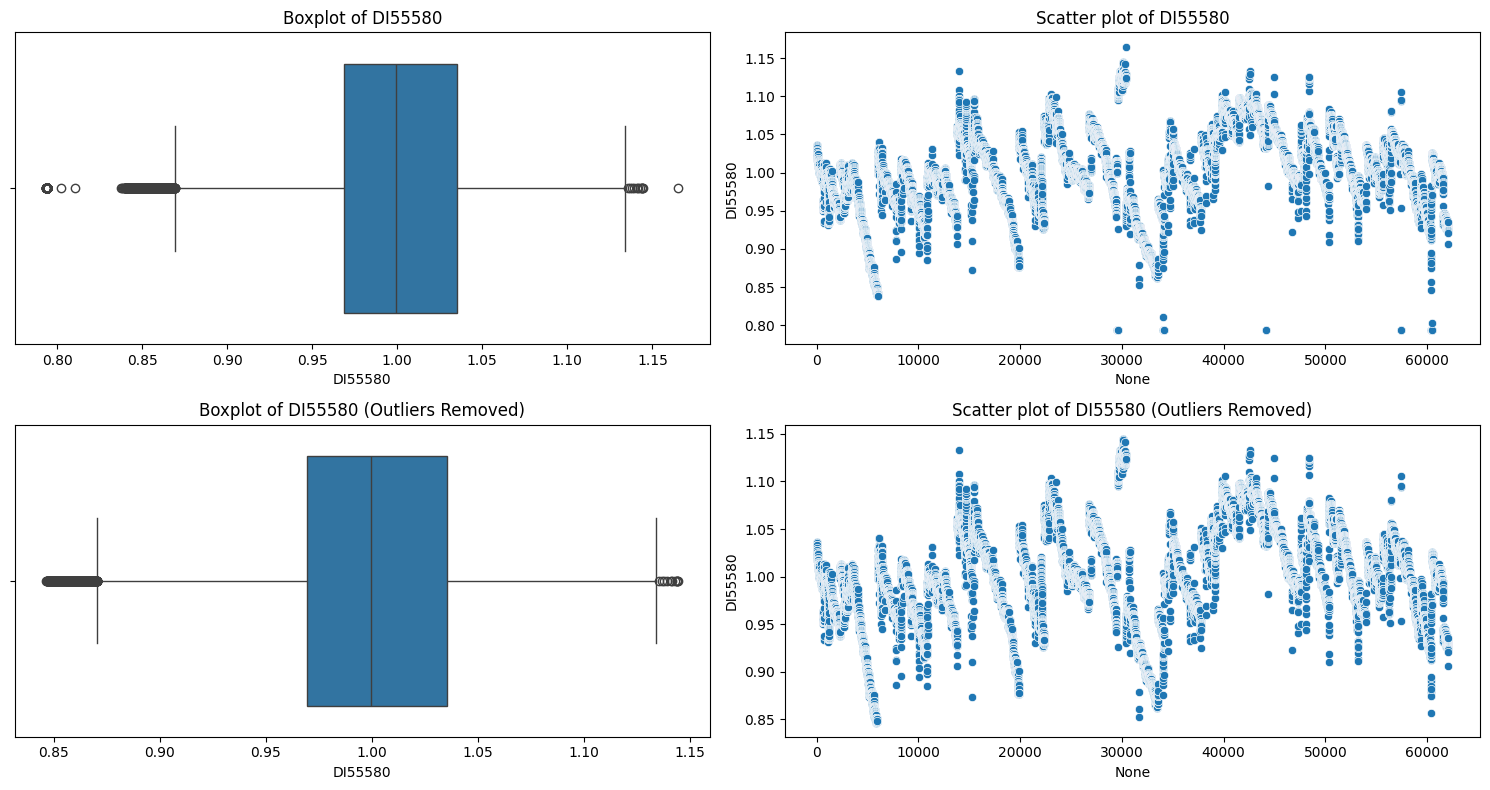

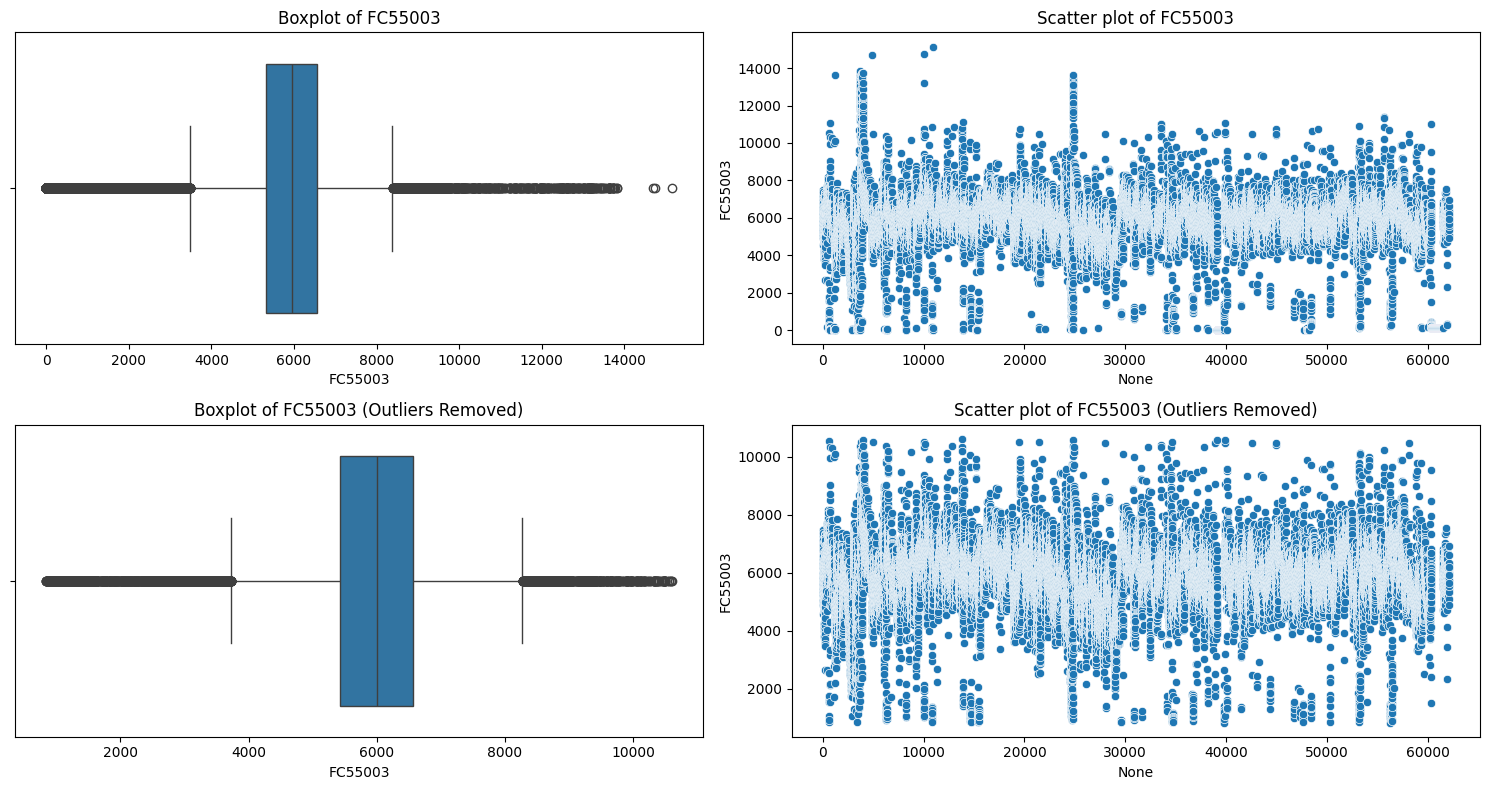

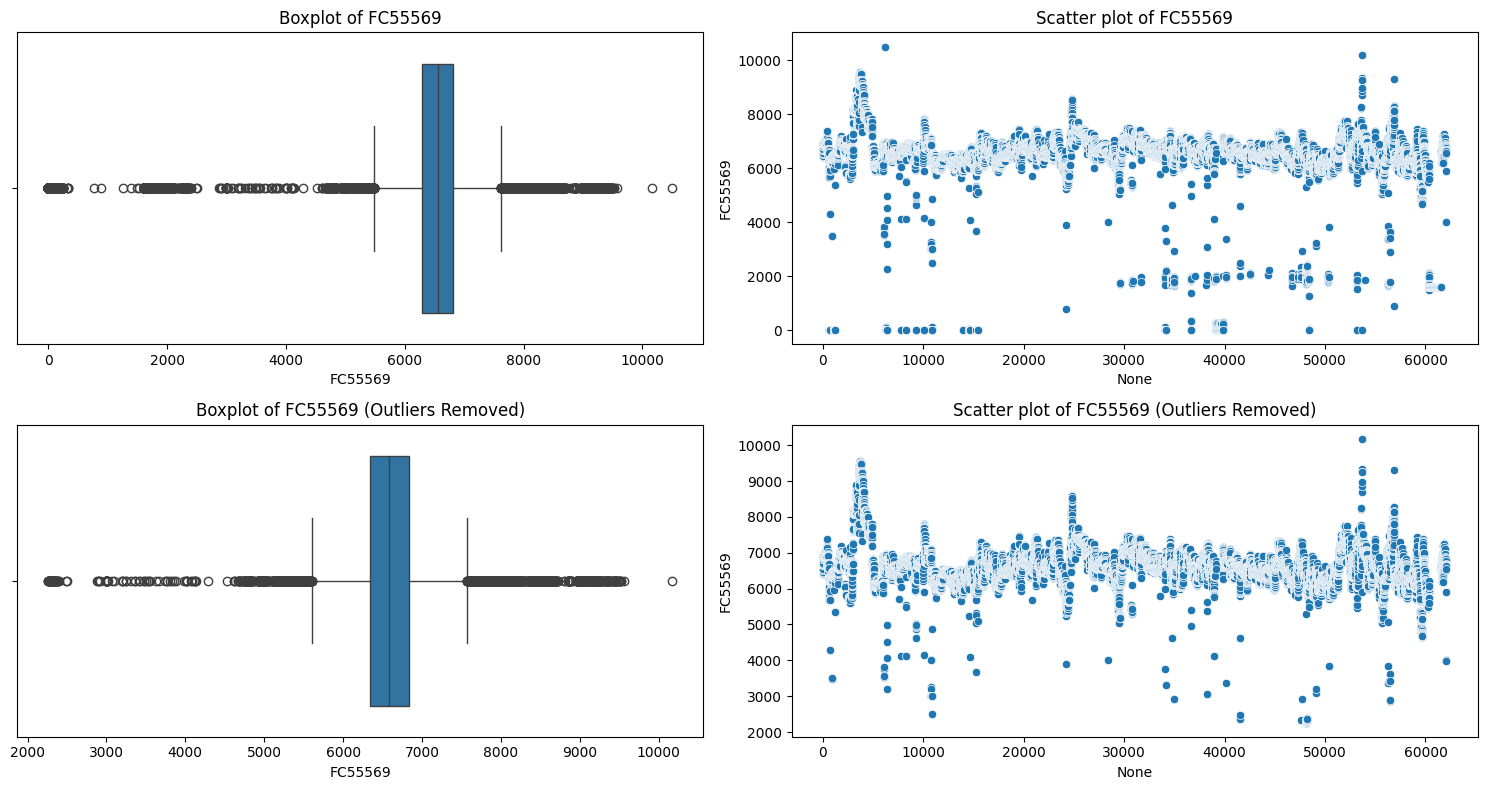

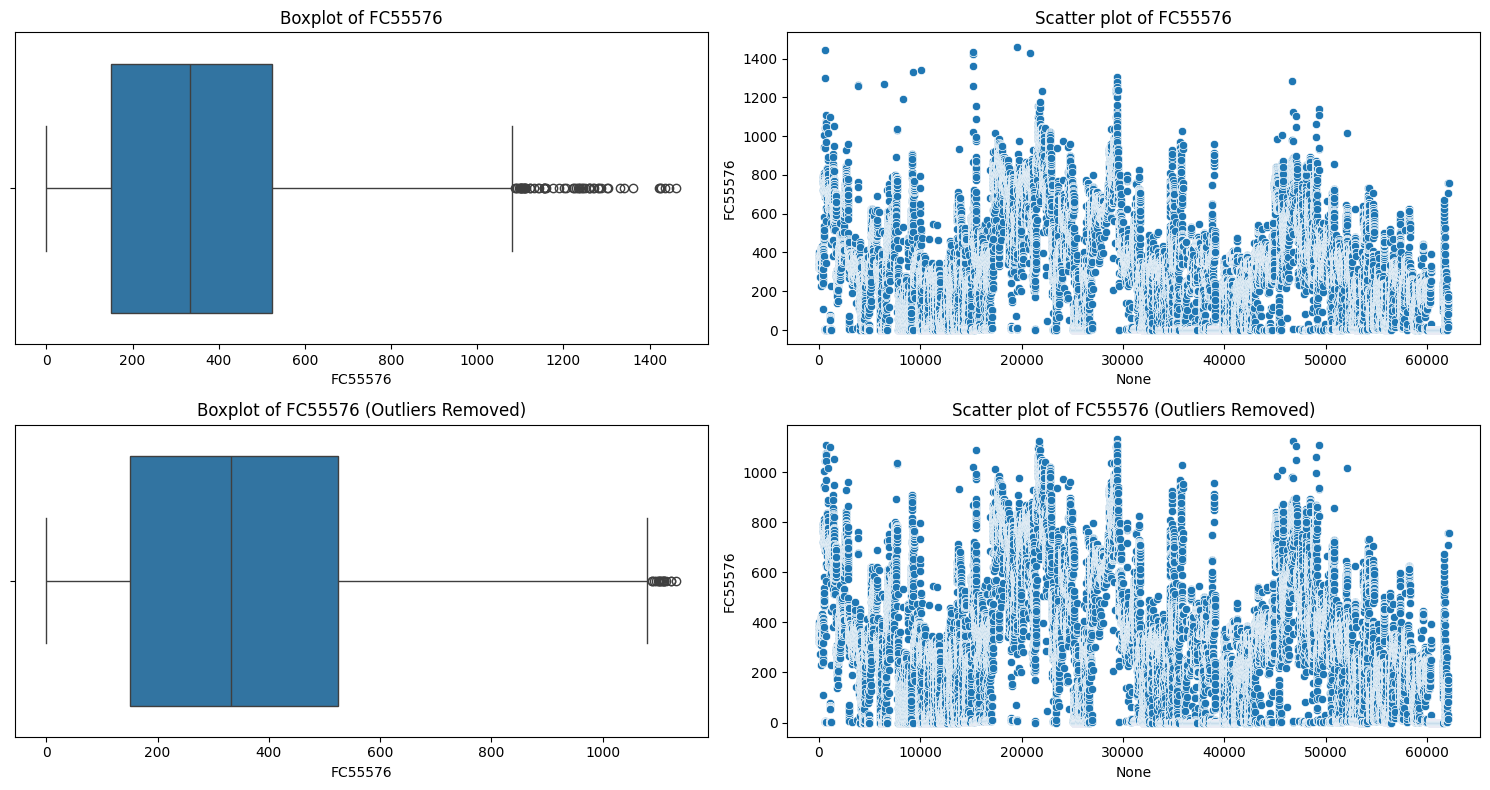

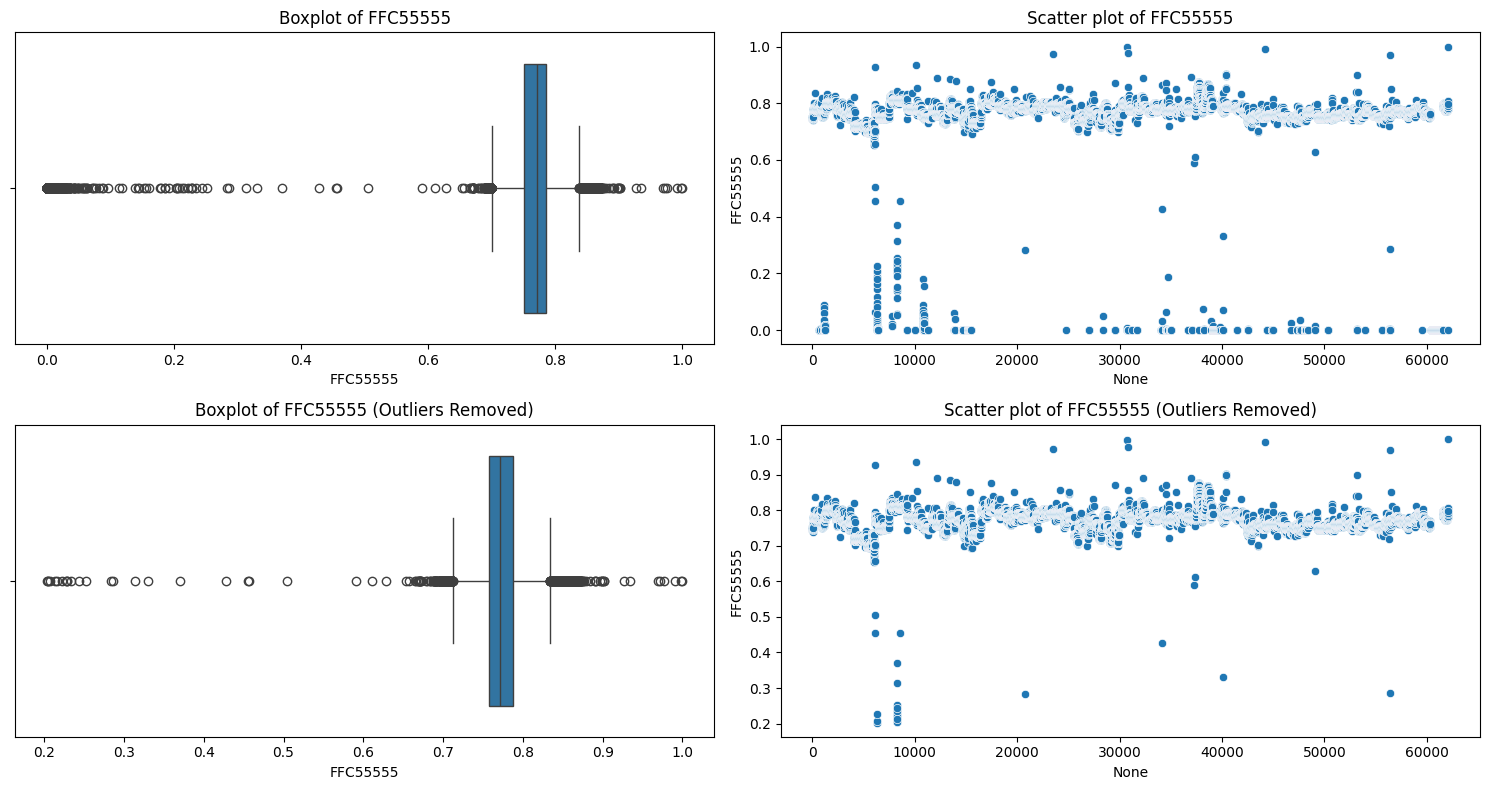

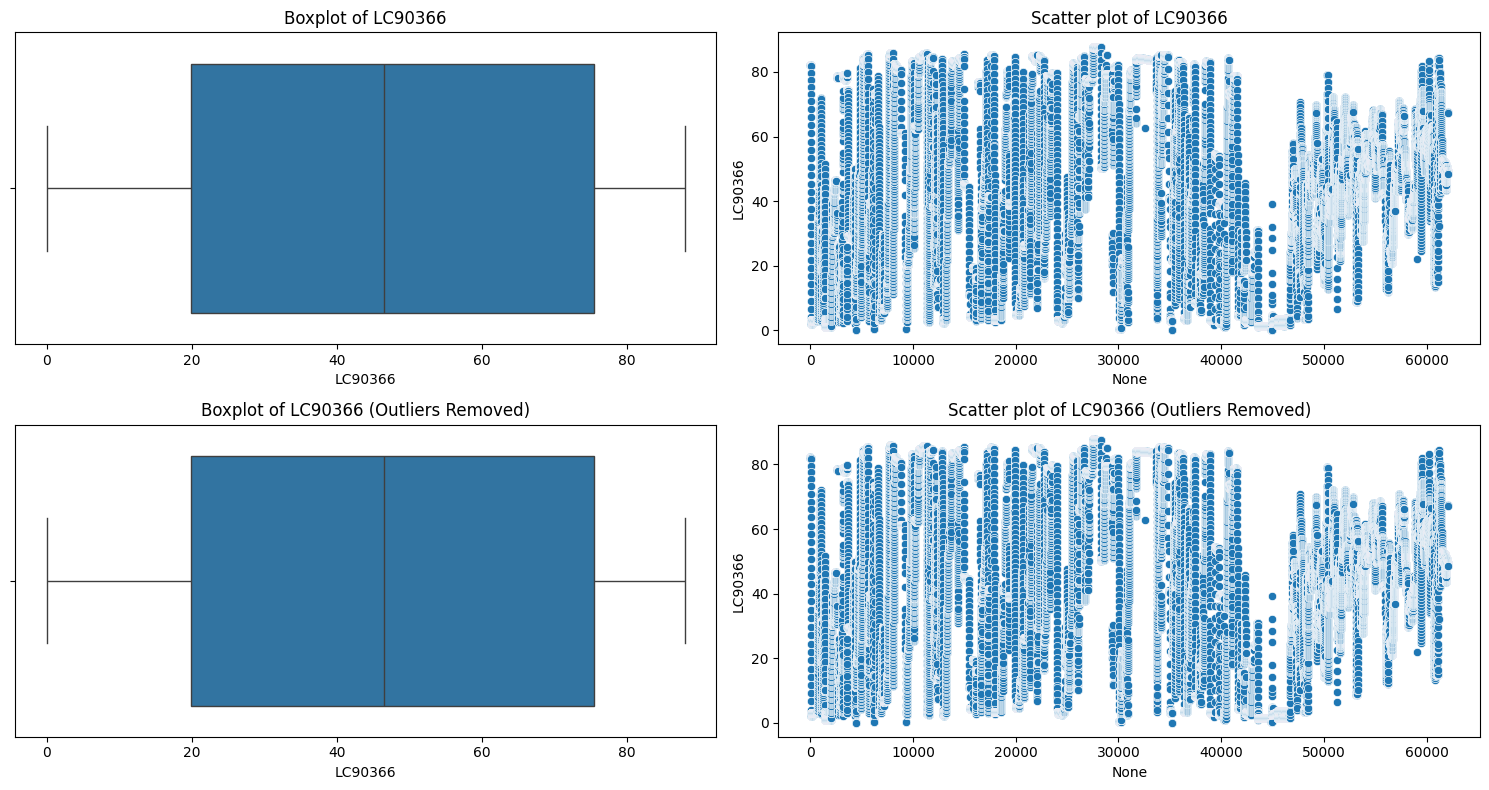

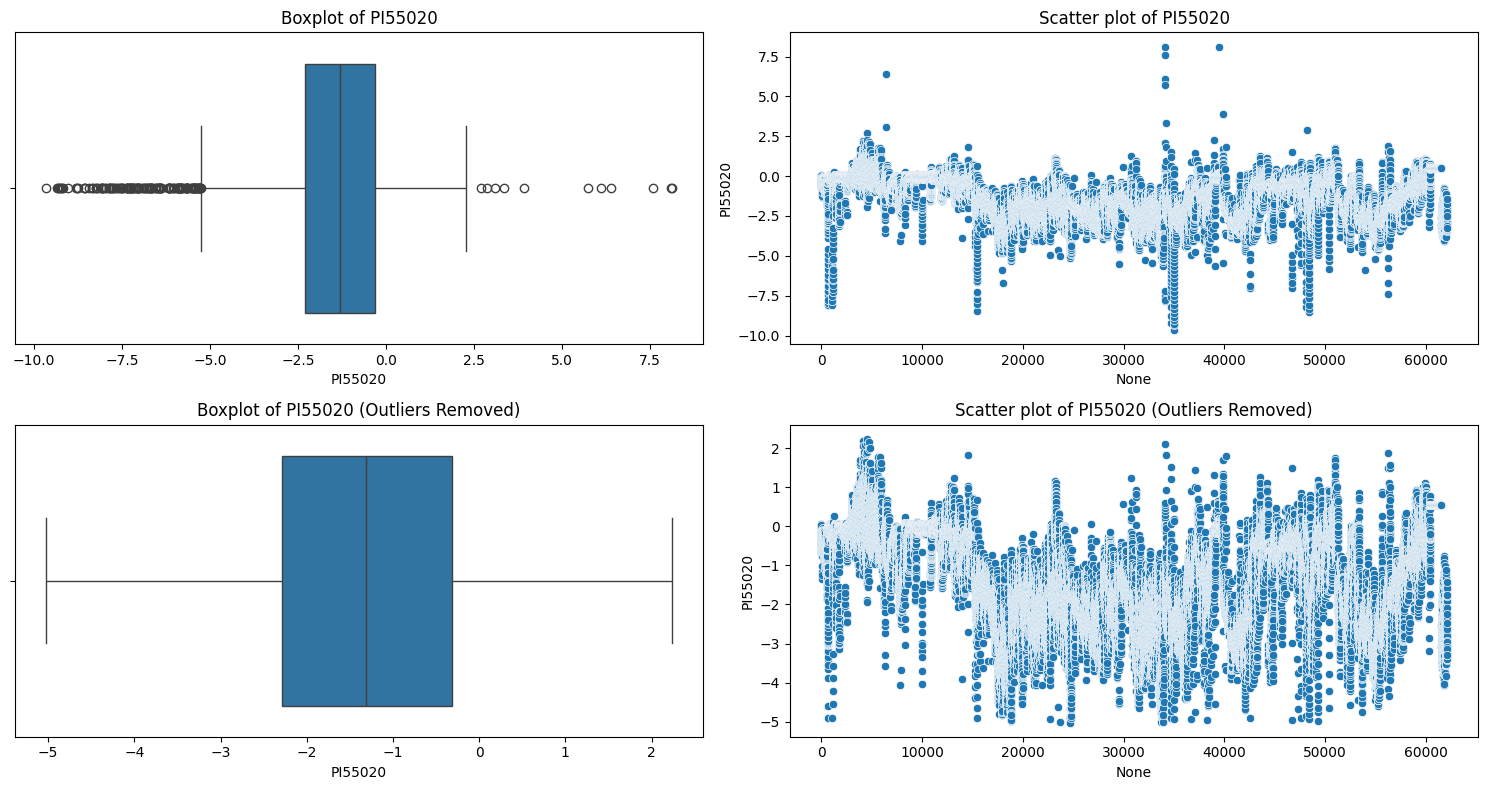

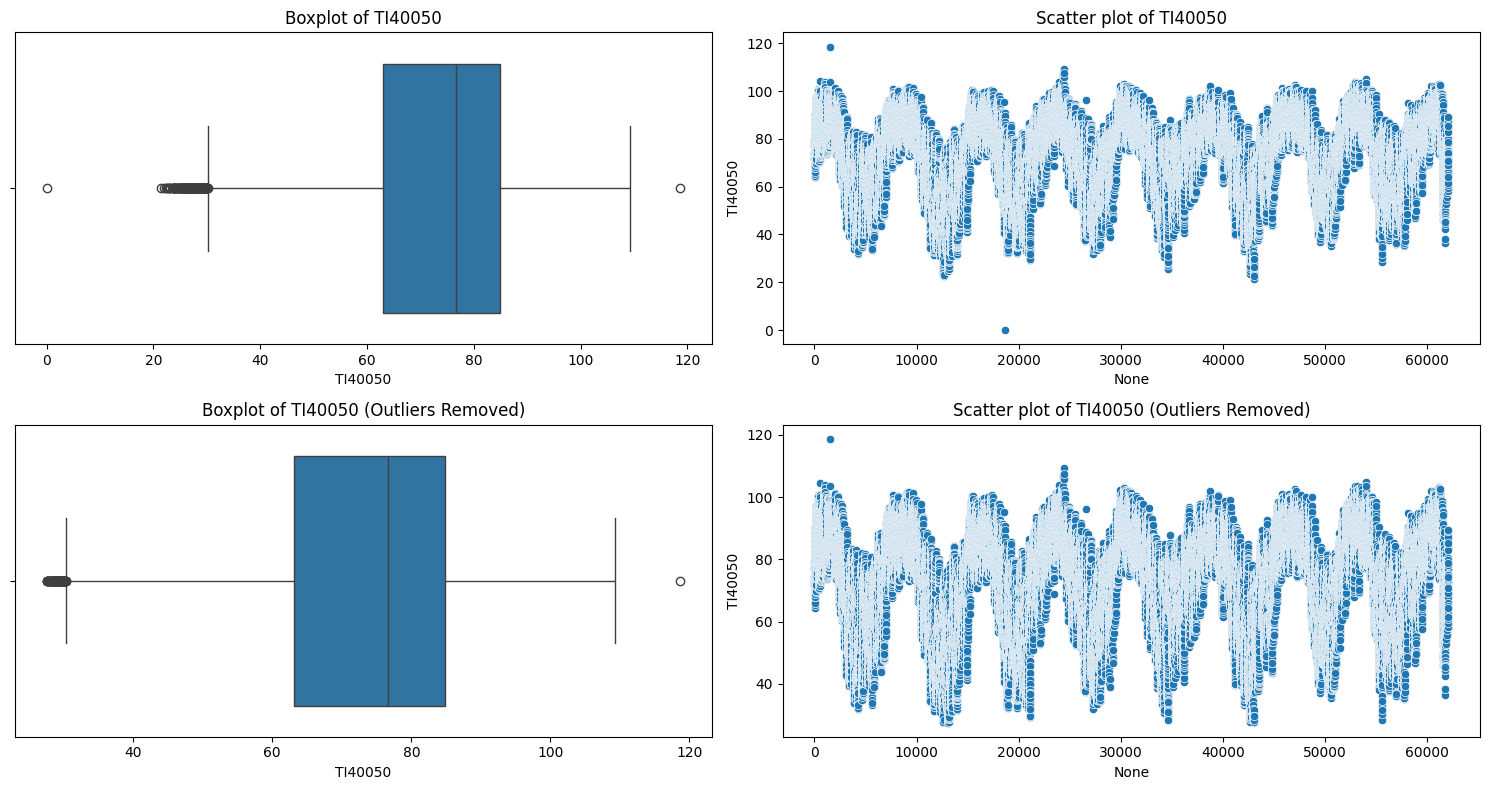

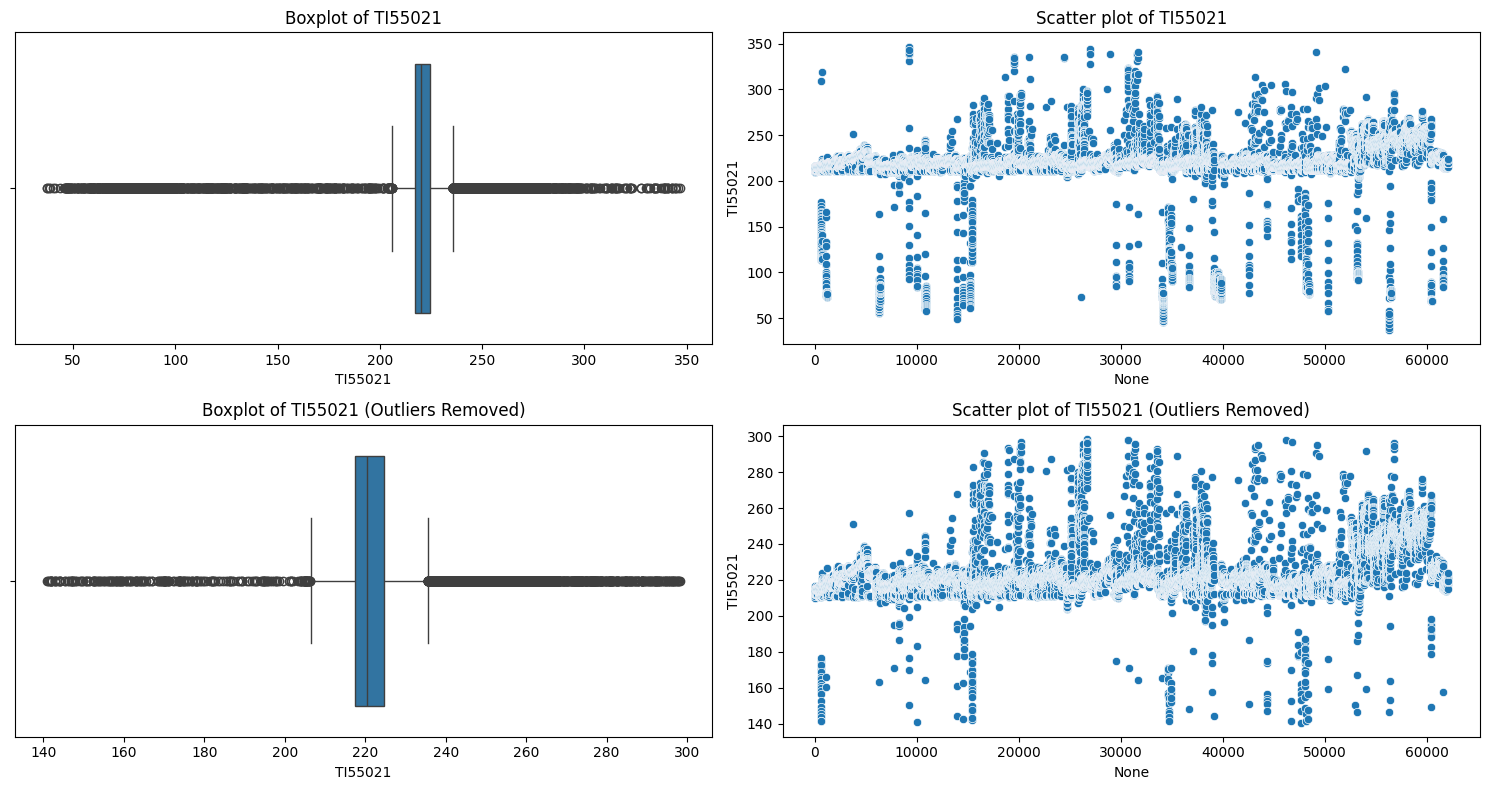

In [8]:

def plot_data(col, data):
    # Check for datetime column
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        print(f"Skipping datetime column: {col}")
        return data[col], None

    # Remove outliers (> 3 standard deviations from the mean)
    mean_col = data[col].mean()
    std_col = data[col].std()
    filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(2, 2, 2)
    sns.scatterplot(x=data[col].index, y=data[col])
    plt.title(f"Scatter plot of {col}")

    plt.subplot(2, 2, 3)
    sns.boxplot(x=filtered_col)
    plt.title(f"Boxplot of {col} (Outliers Removed)")

    plt.subplot(2, 2, 4)
    sns.scatterplot(x=filtered_col.index, y=filtered_col)
    plt.title(f"Scatter plot of {col} (Outliers Removed)")

    plt.tight_layout()
    plt.show()

    return data[col], filtered_col

# Initialize dictionaries to store data
df_plotted = {}
df_plotted_Outliers_removed = {}

# Loop through each column to plot the data
for col in df_outlierHandling.columns:
    plotted, plotted_filtered = plot_data(col, df_outlierHandling)
    df_plotted[col] = plotted
    if plotted_filtered is not None:
        df_plotted_Outliers_removed[col] = plotted_filtered

# Convert the dictionaries to DataFrames
df_plotted = pd.DataFrame(df_plotted)
df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)

# Ensure "Date" column is present in df_plotted_Outliers_removed
if "Date" in df_outlierHandling.columns and "Date" not in df_plotted_Outliers_removed.columns:
    df_plotted_Outliers_removed["Date"] = df_outlierHandling["Date"]


In [9]:
# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], data[col]  # keep datetime columns as they are

# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], None  # keep datetime columns as they are

#     # Remove outliers (> 3 standard deviations from the mean)
#     mean_col = data[col].mean()
#     std_col = data[col].std()
#     filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

#     plt.figure(figsize=(15, 8))

#     plt.subplot(2, 2, 1)
#     sns.boxplot(x=data[col])
#     plt.title(f"Boxplot of {col}")

#     plt.subplot(2, 2, 2)
#     sns.scatterplot(x=data[col].index, y=data[col])
#     plt.title(f"Scatter plot of {col}")

#     plt.subplot(2, 2, 3)
#     sns.boxplot(x=filtered_col)
#     plt.title(f"Boxplot of {col} (Outliers Removed)")

#     plt.subplot(2, 2, 4)
#     sns.scatterplot(x=filtered_col.index, y=filtered_col)
#     plt.title(f"Scatter plot of {col} (Outliers Removed)")

#     plt.tight_layout()
#     plt.show()

#     return data[col], filtered_col

# # Create empty dictionaries to hold the Series
# df_plotted = {}
# df_plotted_Outliers_removed = {}

# # Loop through each column to plot the data
# for col in df_outlierHandling.columns:
#     plotted, plotted_filtered = plot_data(col, df_outlierHandling, remove_outliers=True)
#     df_plotted[col] = plotted
#     if plotted_filtered is not None:
#         df_plotted_Outliers_removed[col] = plotted_filtered

# # Convert the dictionaries to DataFrames
# df_plotted = pd.DataFrame(df_plotted)
# df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)




In [10]:
df_outlierHandling = df_plotted_Outliers_removed.copy()

In [11]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

            ID  total_rows  non_nan_count  nan_count  nan_percentage
0   425_pct_Al       62087          61582        505        0.813375
1        Al2O3       62087          62026         61        0.098249
2   C4_pct_Eth       62087          61862        225        0.362395
3   C4_pct_H2O       62087          61623        464        0.747338
4   C4_pct_Hex       62087          61310        777        1.251470
5      Butanol       62087          60101       1986        3.198737
6      DI55102       62087          62086          1        0.001611
7      DI55152       62087          61606        481        0.774719
8      DI55580       62087          61825        262        0.421989
9      FC55003       62087          59066       3021        4.865753
10     FC55569       62087          59008       3079        4.959170
11     FC55576       62087          62048         39        0.062815
12    FFC55555       62087          58741       3346        5.389212
13     LC90366       62087        

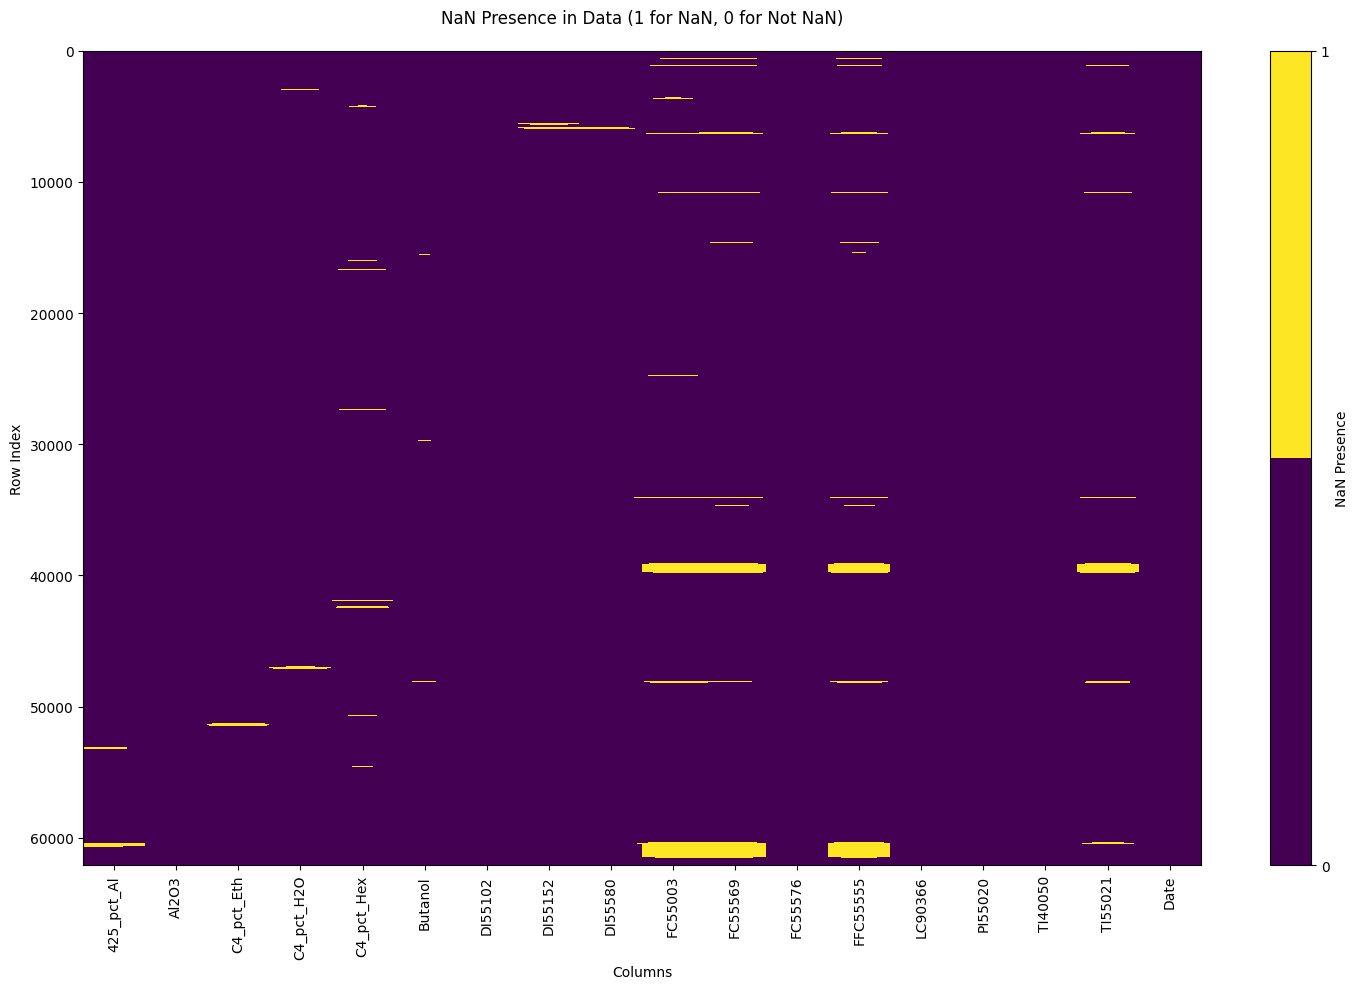

In [12]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [13]:
df_outlierHandling = df_outlierHandling.dropna().copy()



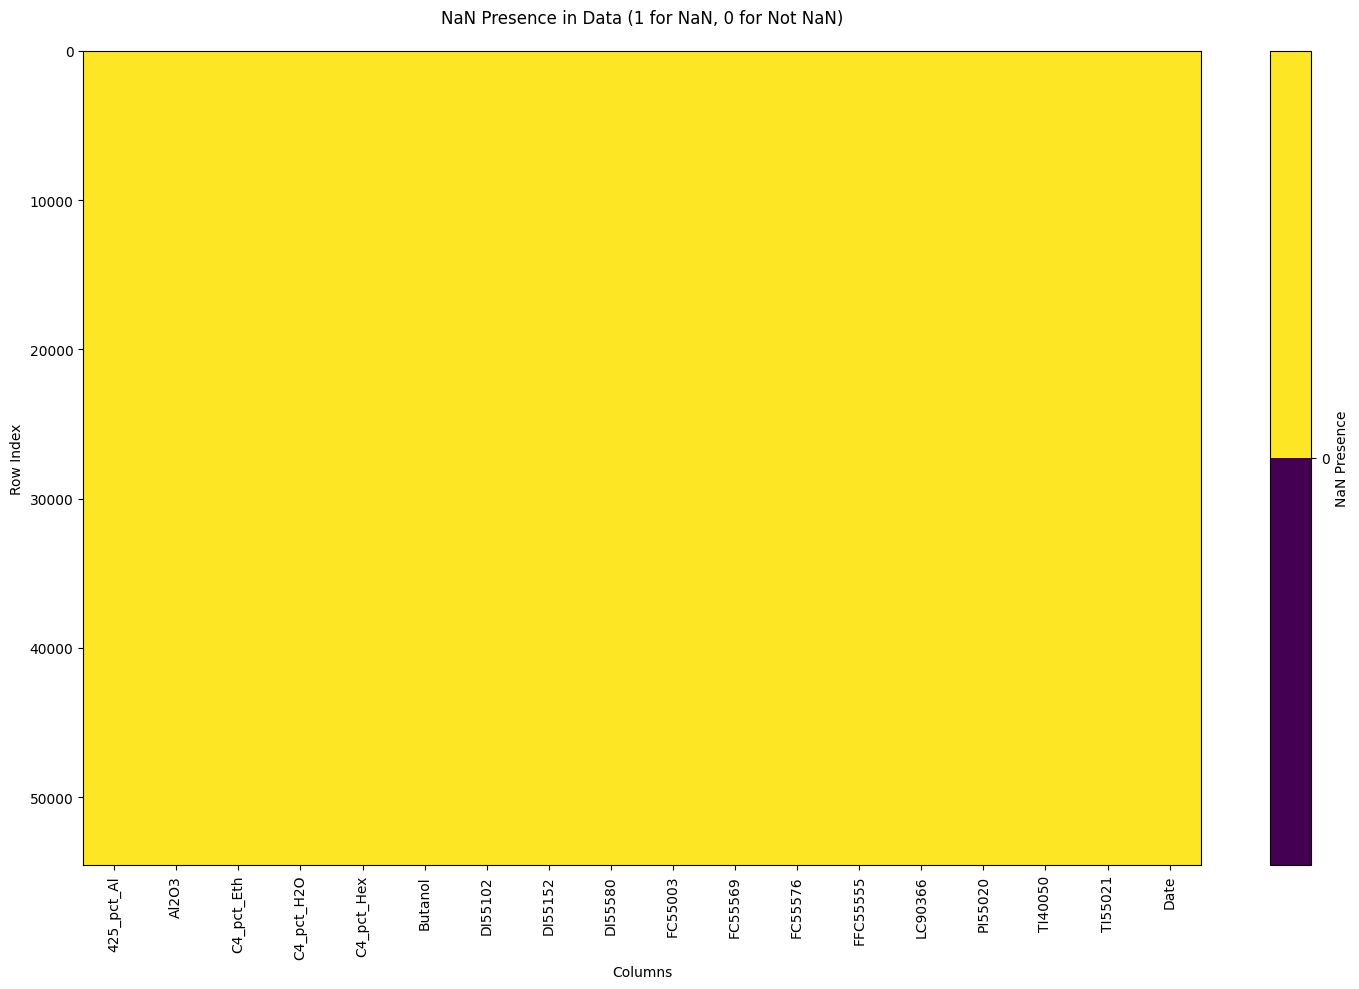

In [14]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [15]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

            ID  total_rows  non_nan_count  nan_count  nan_percentage
0   425_pct_Al       54561          54561          0             0.0
1        Al2O3       54561          54561          0             0.0
2   C4_pct_Eth       54561          54561          0             0.0
3   C4_pct_H2O       54561          54561          0             0.0
4   C4_pct_Hex       54561          54561          0             0.0
5      Butanol       54561          54561          0             0.0
6      DI55102       54561          54561          0             0.0
7      DI55152       54561          54561          0             0.0
8      DI55580       54561          54561          0             0.0
9      FC55003       54561          54561          0             0.0
10     FC55569       54561          54561          0             0.0
11     FC55576       54561          54561          0             0.0
12    FFC55555       54561          54561          0             0.0
13     LC90366       54561        

In [16]:
# 40127  - All Tags included - 3/9/24

num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 18


## Add Columns to Describe Butanol and Decanol Content

Binary data must be added after Outlier handleing :) 

In [17]:
# Add new column 'B', with 1 if 'A' > 25, else 0
# df_outlierHandling['C4_Spec'] = np.where(df_outlierHandling['Butanol'] < 62, 1, 0)
# df_outlierHandling['C10_Spec'] = np.where(df_outlierHandling['Decanol'] < 5, 1, 0)

In [18]:
df_outlierHandling.to_csv('contData_clean.csv', index=False)

df_outlierHandling.columns

Index(['425_pct_Al', 'Al2O3', 'C4_pct_Eth', 'C4_pct_H2O', 'C4_pct_Hex',
       'Butanol', 'DI55102', 'DI55152', 'DI55580', 'FC55003', 'FC55569',
       'FC55576', 'FFC55555', 'LC90366', 'PI55020', 'TI40050', 'TI55021',
       'Date'],
      dtype='object')

In [19]:
saoSelect = ['Date', '425_pct_Al', 'Al2O3', 
            #  'M_Value', 
             'C4_pct_Eth', 'C4_pct_H2O', 'C4_pct_Hex', 
            #  'HydWtr_pct_Ammonia', 
            #  'HydWtr_Na2O'
             ]

fb554Select = ['Date',  'Butanol',
            #    'Butanol', 'Ethanol', 'Hexanol', 'Octanol'
               ]

unitSelect = ['Date', 
    #           'DI55152', 'FC55003', 'FC55552', 
#               'FC55569', 'FFC55553', 'FFC55555', 'LC55555', 
#               'PI55004', 'TC55552', 'TI55021',

#               'DI55152', 'FC55003', 'FC55552', 
#               'FC55569', 'FFC55553', 'FFC55555', 'LC55555', 
#               'PI55004', 'TC55552', 'TC55555', 'TI55021', 'TC55555',

#               'DI55102', 'DI55152', 'DI55580', 'FC42428',
#               'FC55003', 'FC55552', 'FC55569', 'FC55576', 'FFC55553', 'FFC55555',
#               'LC52572', 'LC55553', 'LC55555', 'LC55557', 'LC55568', 'LC90366',
#               'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TC55553', 'TC55555',


            #   'AYC55580', 'DI55102', 'DI55152', 'DI55580', 'FC42428', 'FC52018',
            #   'FC55003', 'FC55009', 'FC55102', 'FC55152', 'FC55552', 'FC55555', 'FC55569', 
            #   'FC55576', 'FFC55553', 'FFC55555', 'FYC55553', 'II52554', 'LC52572', 'LC55553', 
            #   'LC55555', 'LC55557', 'LC55568', 'LC90366', 'LC90368', 'PI55004', 'PI55020', 
            #   'PI55560', 'TC52015', 'TC55552', 'TC55553', 'TC55555', 'TC55566', 'TI40050', 
            #   'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55021', 
            #   'TI55023','VI52558B'
              
              # 'AYC55580', 'DI55580', 'FC42428', 'FC52018', 'FC55102', 'FC55152', 'FC55555', 'FFC55553', 'FYC55553', 'II52554', 'LC52572', 'LC55553', 'LC55555', 'LC55557', 'LC55568', 'PI55560', 'TC52015', 'TC55553', 'TC55555', 'TC55566', 'TI40050', 'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55023', 'VI52558B'
'DI55102', 'DI55152', 'DI55580', 'FC55003', 'FC55569', 'FC55576',
       'FFC55555', 'LC90366', 'PI55020', 'TI40050', 'TI55021'

              ]



df_clean_425 = df_outlierHandling[saoSelect].copy()

df_clean_554 = df_outlierHandling[fb554Select].copy()

df_clean_unit = df_outlierHandling[unitSelect].copy()

num_columns_425 = df_clean_425.shape[1]
num_columns_554 = df_clean_554.shape[1]
num_columns_unit = df_clean_unit.shape[1]
num_columns_total = num_columns_554 + num_columns_425 + num_columns_unit


print("Number of features:", num_columns_total)

print("Number of features - ['Date']*2:", num_columns_total-2)


Number of features: 20
Number of features - ['Date']*2: 18


In [20]:
# df_clean_425.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_425Data_clean.csv', index=False)

# df_clean_554.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_554Data_clean.csv', index=False)

# df_clean_unit.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_unitData_clean.csv', index=False)


In [21]:
# bordeCode

df_clean_425.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\5 Preprocessing - Slecected Features\Continuous Data\cont_425Data_clean.csv', index=False)

df_clean_554.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\5 Preprocessing - Slecected Features\Continuous Data\cont_554Data_clean.csv', index=False)

df_clean_unit.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\5 Preprocessing - Slecected Features\Continuous Data\cont_unitData_clean.csv', index=False)

In [22]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-05-05 22:34:06.387457
